In [ ]:

#Segmentation

In [1]:
import cv2
import numpy as np
from IPython.display import display
import ipywidgets as widgets
import matplotlib.pyplot as plt

# Create a file upload widget
uploader = widgets.FileUpload()

# Display the file upload widget
display(uploader)

def on_upload_change(change):
    # Get the uploaded image file
    uploaded_filename = list(uploader.value.keys())[0]
    uploaded_content = uploader.value[uploaded_filename]['content']

    # Convert the uploaded image content to a numpy array
    nparr = np.frombuffer(uploaded_content, np.uint8)

    # Decode the numpy array into an image
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

    # Display the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Attach the on_upload_change function to the widget's observe method
uploader.observe(on_upload_change, names='_counter')


FileUpload(value=(), description='Upload')

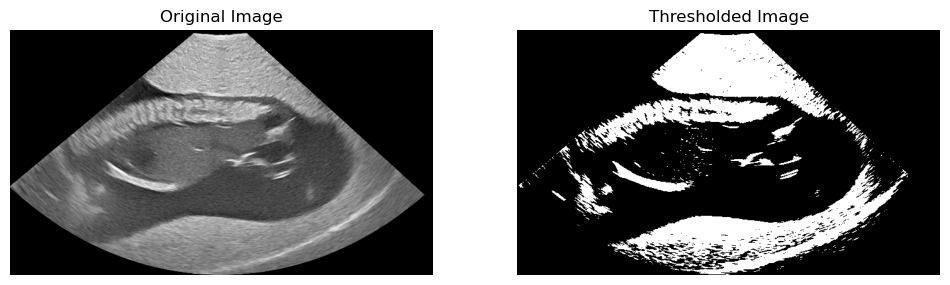

In [2]:
# Threshold segmentation
import cv2
import matplotlib.pyplot as plt

# Load an image (grayscale)
image = cv2.imread("C:\\Users\\Bhargavi\\OneDrive\\Desktop\\USLL\\Dataset fetus\\Train\\frame_000112.png", 0)

# Set a threshold value (you can adjust this)
threshold_value = 128

# Apply thresholding
_, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.show()


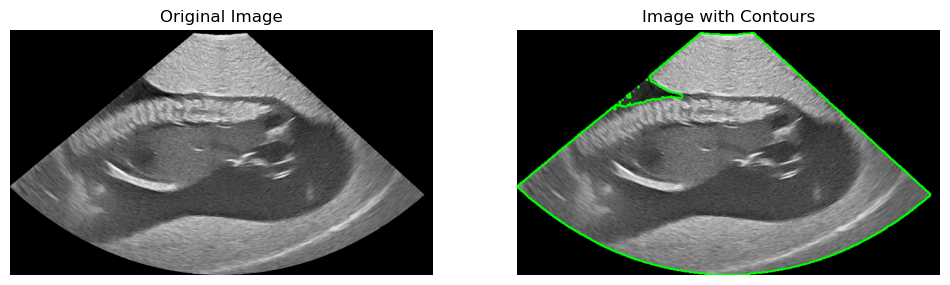

In [3]:
# Region based segmentation
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "C:\\Users\\Bhargavi\\OneDrive\\Desktop\\USLL\\Dataset fetus\\Train\\frame_000112.png"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply thresholding to create a binary image
_, thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a copy of the original image
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# Display the original image with detected contours using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')
plt.axis('off')

plt.show()


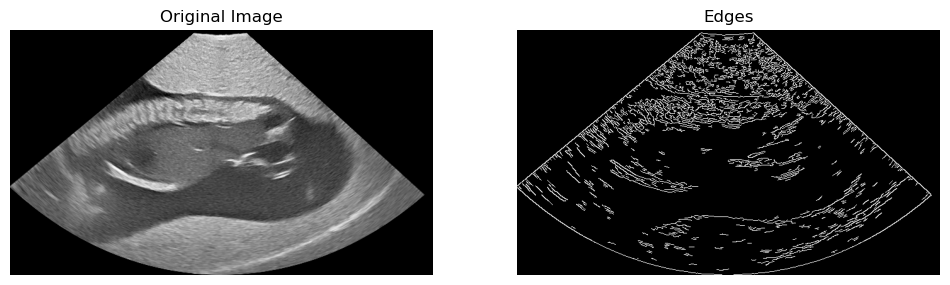

In [4]:
# edge base segmentation
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "C:\\Users\\Bhargavi\\OneDrive\\Desktop\\USLL\\Dataset fetus\\Train\\frame_000112.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection to find edges
edges = cv2.Canny(image, 100, 200) # You can adjust the threshold values

# Display the original image and the edges
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.axis('off')

plt.show()


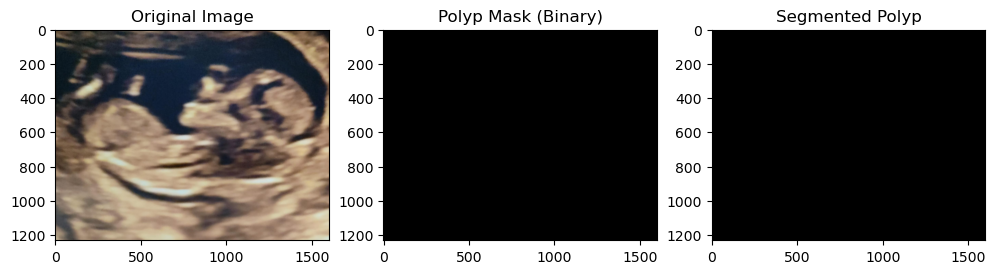

In [5]:
# semantic segmentation
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a sample image (replace with your colonoscopy image)
image = cv2.imread("C:\\Users\\Bhargavi\\OneDrive\\Desktop\\USLL\\Dataset fetus\\Train\\IMG-20240211-WA0019.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define a color range for the polyp (you may need to adjust these values)
lower_bound = np.array([0, 0, 100], dtype=np.uint8)
upper_bound = np.array([100, 100, 255], dtype=np.uint8)

# Create a mask for the polyp region based on color range
polyp_mask = cv2.inRange(image_rgb, lower_bound, upper_bound)

# Apply some morphological operations to clean up the mask
kernel = np.ones((5, 5), np.uint8)
polyp_mask = cv2.morphologyEx(polyp_mask, cv2.MORPH_OPEN, kernel)
polyp_mask = cv2.morphologyEx(polyp_mask, cv2.MORPH_CLOSE, kernel)

# Apply the mask to the original image to visualize the segmented polyp
segmented_image = cv2.bitwise_and(image_rgb, image_rgb, mask=polyp_mask)

# Increase the figure size
plt.figure(figsize=(12, 4))

# Display the original image
plt.subplot(131)
plt.imshow(image_rgb)
plt.title('Original Image')

# Display the polyp mask (binary segmentation)
plt.subplot(132)
plt.imshow(polyp_mask, cmap='gray')
plt.title('Polyp Mask (Binary)')

# Display the segmented polyp
plt.subplot(133)
plt.imshow(segmented_image)
plt.title('Segmented Polyp')

plt.show()


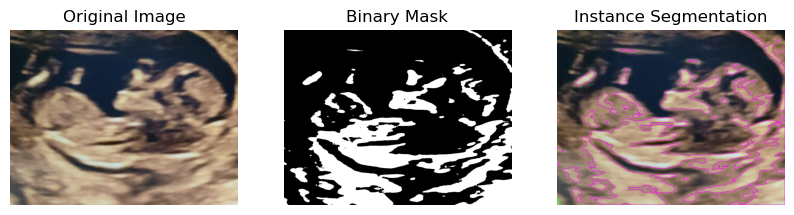

In [6]:
# Instance segmentation
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = "C:\\Users\\Bhargavi\\OneDrive\\Desktop\\USLL\\Dataset fetus\\Train\\IMG-20240211-WA0019.jpg"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to segment the horse
_, binary_mask = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Find contours in the binary mask (identifying object boundaries)
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to draw instance boundaries
instance_image = image.copy()

# Distinguish instances by drawing contours with different colors
for i, contour in enumerate(contours):
    color = (0, 255, 0) if i == 0 else (255, 0, 255)  # Green for the first object, purple for the second, and so on
    cv2.drawContours(instance_image, [contour], -1, color, 2)

# Display the original image, binary mask, and instance segmentation result using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(instance_image, cv2.COLOR_BGR2RGB))
plt.title('Instance Segmentation')
plt.axis('off')

plt.show()


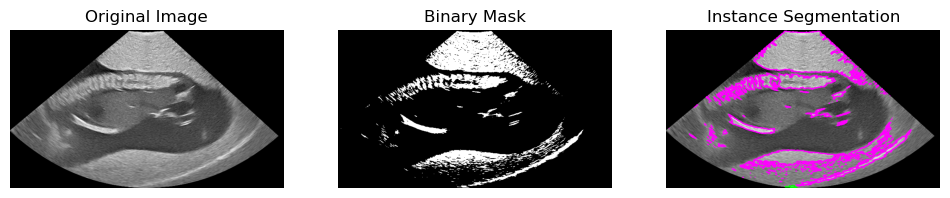

In [6]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an example image (you can replace this with your own image)
image = cv2.imread( "C:\\Users\\Bhargavi\\OneDrive\\Desktop\\USLL\\Dataset fetus\\Train\\frame_000112.png")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to segment the horse
_, binary_mask = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Find contours in the binary mask (identifying object boundaries)
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to draw instance boundaries
instance_image = image.copy()

# Distinguish instances by drawing contours with different colors
for i, contour in enumerate(contours):
    color = (0, 255, 0) if i == 0 else (255, 0, 255)  # Green for the first object, purple for the second, and so on
    cv2.drawContours(instance_image, [contour], -1, color, 2)

# Display the original image, binary mask, and instance segmentation result using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(instance_image, cv2.COLOR_BGR2RGB))
plt.title('Instance Segmentation')
plt.axis('off')

plt.show()



In [ ]:
#k means clustering

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


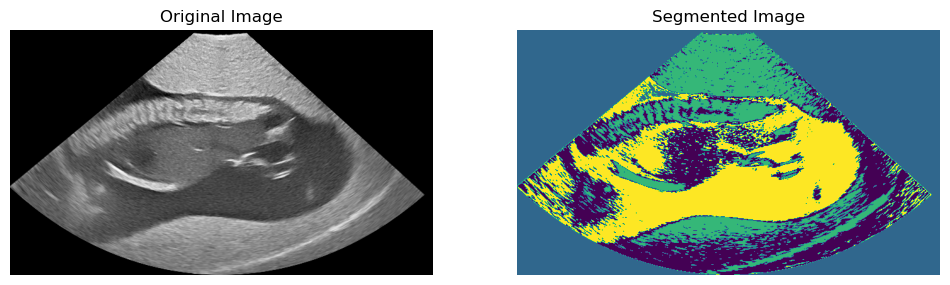

In [16]:

import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the image
image_path = "C:\\Users\\Bhargavi\\OneDrive\\Desktop\\USLL\\Dataset fetus\\Train\\frame_000112.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels (height * width, 3)
pixels = image.reshape((-1, 3))

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(pixels)

# Reshape the labels to match the original image shape
segmented_image = labels.reshape(image.shape[0], image.shape[1])

# Display the original image and the segmented image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='viridis')
plt.axis('off')
plt.title('Segmented Image')

plt.show()

